In [1]:
from mesa import batch_run
from Model import EvacuationDec
import seaborn as sns
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

#  Verification
This notebook contains extra code used for verification. The print statements needed for some parts of the verification process are commented out in agent.py and model.py.

<span style="color:red"> Sometimes the default values within the model itself has been tweaked. So running code again will not give identical results. All lines saving data are commented to preserve orginal data. </span>.

## Single-agent tests

### Enviromental cues
This code cell performs a verification analysis by visualizing the relationship between environmental cues and risk perception for selected agents in a simulated evacuation model. It runs multiple simulation iterations, retrieves the results, and generates comparative line plots for both wind cues and rain cues alongside agent risk perception. The plots display how these environmental factors and agents' perceived risk evolve over time for a chosen subset of agents, allowing for detailed inspection of individual behavioral trajectories during the simulation.


  0%|          | 0/100 [00:00<?, ?it/s]

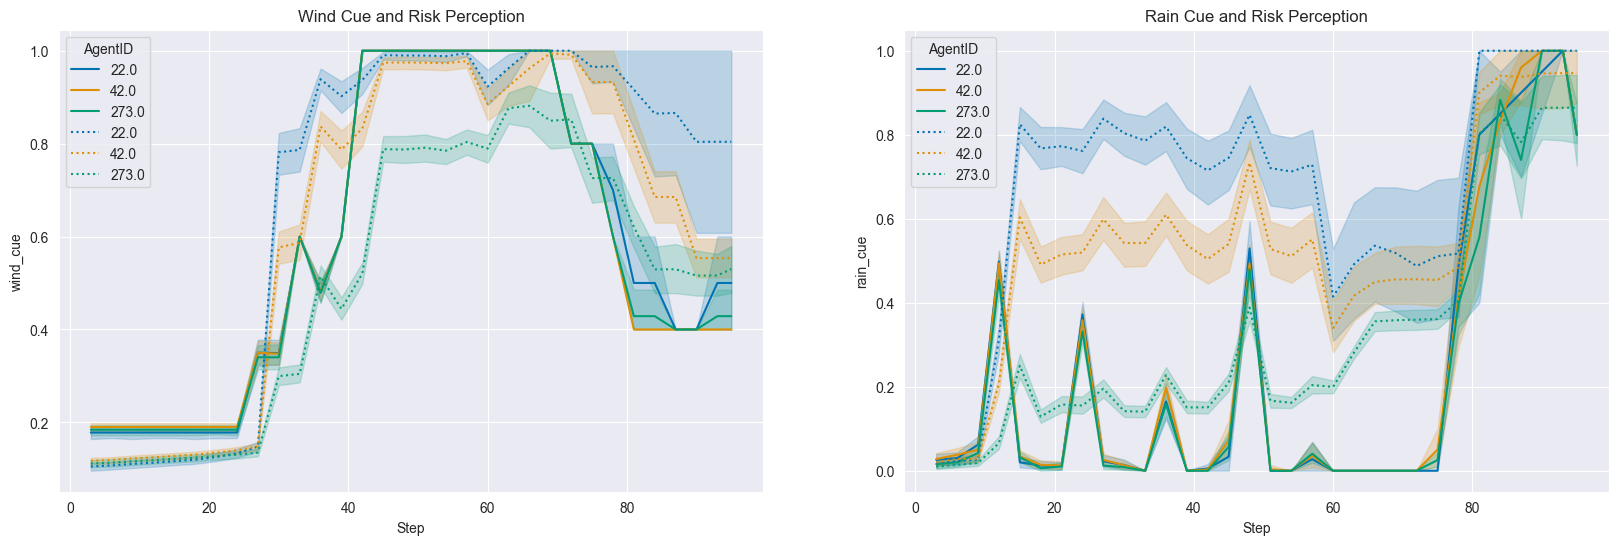

In [3]:
params = {"outcome_collection" : "SingleRun","init_individuals":[1000]}
result_batch = batch_run(
    EvacuationDec,
    parameters=params,
    iterations=100,
    max_steps=94,
    number_processes= 10,
    data_collection_period=3,
    display_progress=True,
)
result_batch = pd.DataFrame(result_batch)
# result_batch.to_csv(r"C:\Users\roelo\Downloads\Clean_thesis\archives\rain.csv")

# Assuming result_batch is a DataFrame containing the relevant data
result_batch = pd.read_csv(r"C:\Users\roelo\Downloads\Clean_thesis\archives\win.csv")
agent_42 = result_batch[result_batch["AgentID"].isin([42, 273, 22])]
fig, ax = plt.subplots(1,2,figsize=(20, 6))

sns.lineplot(x="Step", y="wind_cue", data=agent_42, hue="AgentID", ax=ax[0], palette="colorblind")
sns.lineplot(x="Step", y="risk_perception", data=agent_42, hue="AgentID", ax=ax[0], palette="colorblind", linestyle=":")


result_batch = pd.read_csv(r"C:\Users\roelo\Downloads\Clean_thesis\archives\rain.csv")
agent_42 = result_batch[result_batch["AgentID"].isin([42, 273, 22])]


sns.lineplot(x="Step", y="rain_cue", data=agent_42, hue="AgentID", ax=ax[1], palette="colorblind")
sns.lineplot(x="Step", y="risk_perception", data=agent_42, hue="AgentID", ax=ax[1], palette="colorblind", linestyle=":")

ax[0].set_title('Wind Cue and Risk Perception')
ax[1].set_title('Rain Cue and Risk Perception')
plt.show()

### Media cues
This code cell evaluates the effect of media cues on selected agents' risk perception throughout the simulation. After running the model and loading the relevant results, it filters the data for specific agents and creates a line plot displaying both the media cue and the agent's risk perception at each time step. The resulting visualization helps to examine how media information and risk perception co-evolve or interact for individual agents during the evacuation process.


In [ ]:
params = {"outcome_collection" : "SingleRun","init_individuals":[1000]}
result_batch = batch_run(
    EvacuationDec,
    parameters=params,
    iterations=100,
    max_steps=94,
    number_processes= 10,
    data_collection_period=3,
    display_progress=True,
)
result_batch = pd.DataFrame(result_batch)
# result_batch.to_csv(r"C:\Users\roelo\Downloads\Clean_thesis\archives\media.csv")

# Assuming result_batch is a DataFrame containing the relevant data
result_batch = pd.read_csv(r"C:\Users\roelo\Downloads\Clean_thesis\archives\media.csv")
agent_42 = result_batch[result_batch["AgentID"].isin([42, 273, 22])]
fig, ax = plt.subplots(1,1,figsize=(20, 6))

sns.lineplot(x="Step", y="media_cue", data=agent_42, hue="AgentID", ax=ax, palette="colorblind")
sns.lineplot(x="Step", y="risk_perception", data=agent_42, hue="AgentID", ax=ax, palette="colorblind", linestyle=":")

ax.set_title('Media Cue and Risk Perception')

plt.show()

### Phase change
This code cell analyzes the progression of different decision phases for selected agents during the simulation. After running the batch of model simulations, it creates stacked bar charts for each chosen agent, showing how often each phase occurs at every time step. Each subplot provides a visual summary of the agent's phase transitions throughout the scenario, facilitating the examination of individual behavioral patterns and phase changes over time.


In [4]:
params = {"outcome_collection" : "SingleRun","init_individuals":[1000]}
result_batch = batch_run(
    EvacuationDec,
    parameters=params,
    iterations=100,
    max_steps=94,
    number_processes= 10,
    data_collection_period=3,
    display_progress=True,
)
result_batch = pd.DataFrame(result_batch)

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
agent_ids = [42, 247, 22]

for idx, agent_id in enumerate(agent_ids):
    agent_data = result_batch[result_batch["AgentID"] == agent_id]
    # Group by Step and phase, and count occurrences
    phase_counts = agent_data.groupby(['Step', 'phase']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    phase_counts.plot(kind='bar', stacked=True, ax=axes[idx], colormap='tab20')
    axes[idx].set_xlabel('Time Step')
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Phase Changes for Agent {agent_id}')
    axes[idx].legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
# result_batch.to_csv(r"C:\Users\roelo\Downloads\Clean_thesis\archives\phase.csv")

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Minimal model tests

Communication tests are done use print statements (commented out now) and main.py

### Social Netork
This code cell visualizes the structure of social networks generated for different population sizes in the evacuation model. For each population size, it creates a network graph where nodes represent agents and node colors indicate the degree (number of connections each agent has). The networks are displayed in a 2x2 grid of subplots, allowing for comparison across different population scales. Each subplot also provides the average and standard deviation of the node degrees, giving insight into the connectivity patterns and variability within each network. Legends denote node degrees for easier interpretation of the color mapping.


Finished simulation
Finished simulation
Finished simulation
Finished simulation


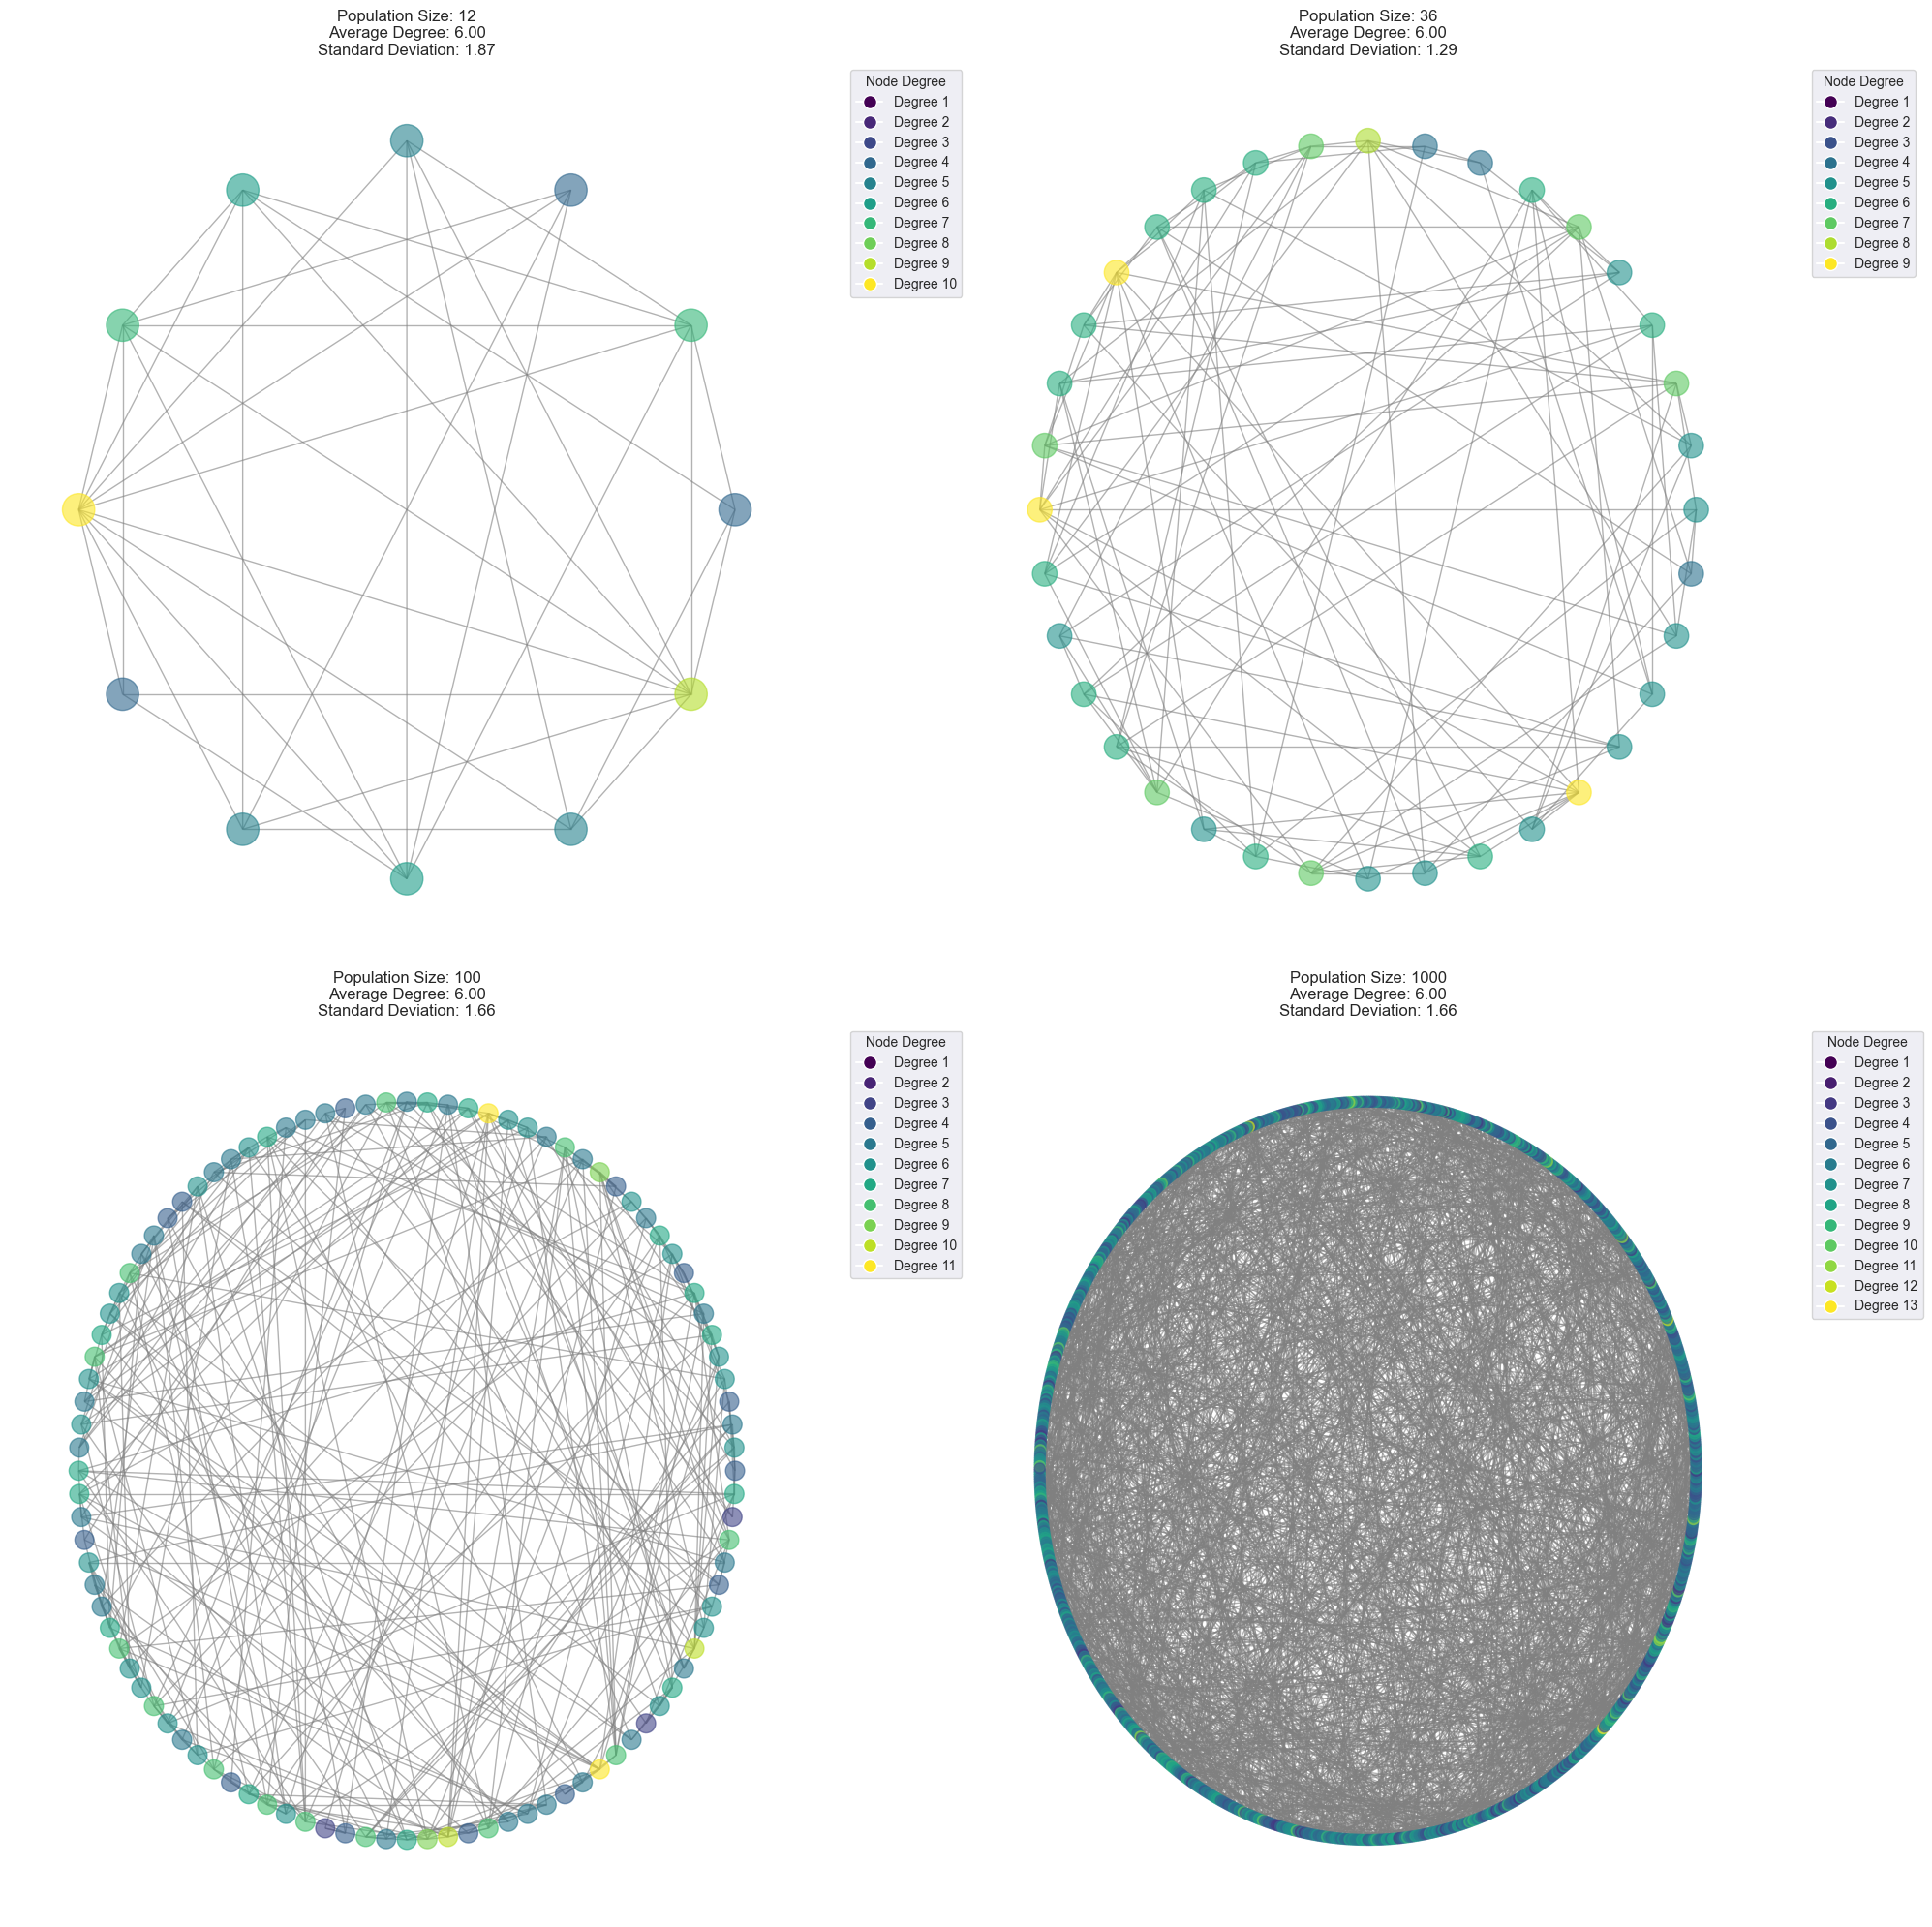

In [5]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()

populations = [12, 36, 100, 1000]

for i, pop in enumerate(populations):
    model = EvacuationDec(init_individuals=pop, outcome_collection="SingleRun")
    G = model.G

    # Get positions of nodes
    pos = nx.shell_layout(G)  # Changed to spring_layout for better visualization of larger networks

    # Define discrete colors based on max degree
    max_degree = max(dict(G.degree()).values())
    unique_degrees = list(range(1, max_degree + 1))
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_degrees)))
    color_map = dict(zip(unique_degrees, colors))

    # Calculate node degrees and map to colors
    degrees = dict(G.degree())
    avg_degree = sum(degrees.values()) / len(degrees)
    std_degree = np.std(list(degrees.values()))
    node_colors = [color_map[degrees[node]] for node in G.nodes()]

    # Draw the network
    scatter = nx.draw(G, pos=pos,
                      node_color=node_colors,
                      node_size=2000 / np.sqrt(pop),  # Adjust node size based on population
                      edge_color='gray',
                      alpha=0.6,
                      with_labels=False,  # Changed to False for larger networks
                      ax=axes[i])

    # Add custom legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor=color_map[deg],
                                  label=f'Degree {deg}',
                                  markersize=10)
                       for deg in unique_degrees[::max(1, len(unique_degrees) // 10)]]  # Show fewer legend items
    axes[i].legend(handles=legend_elements, title='Node Degree',
                   bbox_to_anchor=(1.05, 1), loc='upper left')

    axes[i].set_title(f"Population Size: {pop}\nAverage Degree: {avg_degree:.2f}\nStandard Deviation: {std_degree:.2f}")

plt.tight_layout()
plt.show()

### Multi-agent testing
This code runs multiple simulation iterations to collect detailed data for all agents within a large population. After executing the simulations, it computes and displays the minimum and maximum values for each column (variable) in the resulting DataFrame. The `boundaries` DataFrame provides an overview of the range (min and max) observed for each variable across all agents and time steps


In [6]:
params = {"outcome_collection" : "all_agent","init_individuals":[1000]}
result_batch = batch_run(
    EvacuationDec,
    parameters=params,
    iterations=150,
    max_steps=94,
    number_processes= 10,
    data_collection_period=3,
    display_progress=True,
)
result_batch = pd.DataFrame(result_batch)
boundaries = pd.DataFrame()
boundaries["min"] = result_batch.min()
boundaries["max"] = result_batch.max()
boundaries

  0%|          | 0/12 [00:00<?, ?it/s]

### Warning timing
This code cell simulates a scenario to track the evolution of storm surge alerts within the model over time. It processes the simulation results to extract the state of storm surge warnings and watches at each time step, then visualizes how many areas are under a "watch" or "warning" state using line plots.

  0%|          | 0/1 [00:00<?, ?it/s]

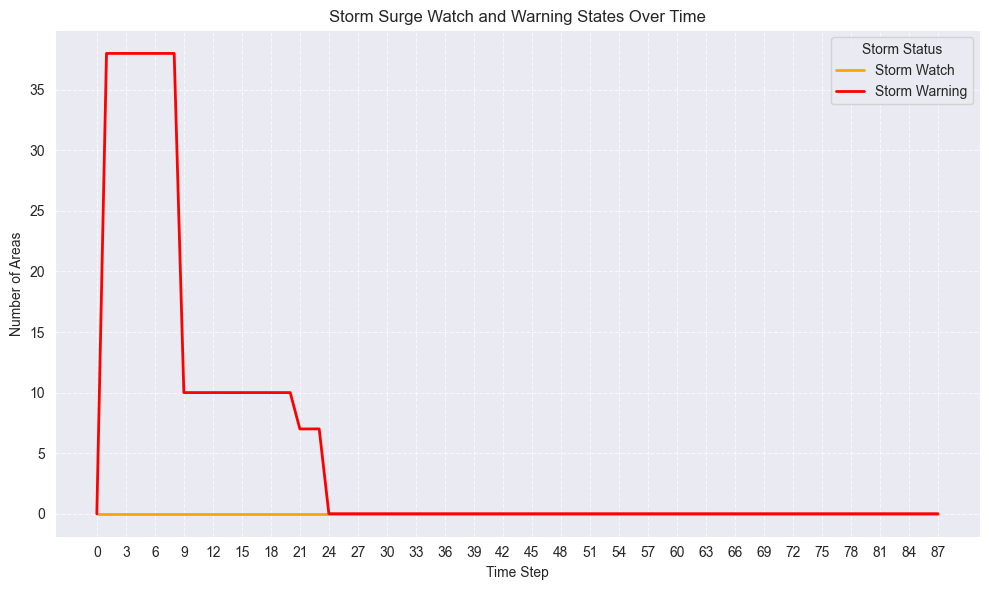

In [2]:
params = {"outcome_collection": ["verf"], "init_individuals": [100],"watch_shift" :0, "communication_timing":24}

result_batch = batch_run(
    EvacuationDec,
    parameters=params,
    iterations=1,
    max_steps=88,
    number_processes=None,
    data_collection_period=1,
    display_progress=True,
)
df = pd.DataFrame(result_batch)

df_storm_surge = df[["RunId", "iteration", "Step", "storm_surge_state"]]
df_storm_surge["watch"] = [1 if x == 0.5 else 0 for x in df_storm_surge["storm_surge_state"]]
df_storm_surge["warning"] = [1 if x == 1 else 0 for x in df_storm_surge["storm_surge_state"]]
start_time = pd.Timestamp("2017-09-03 00:00:00")
# times =[start_time + timedelta(hours=2 * i) for i in set(df_storm_surge["Step"])]
# dictionary = dict(zip([i for i in range(len(times))], times))
df_storm_grouped = df_storm_surge.groupby(by=["Step"]).sum()

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=df_storm_grouped.index, y=df_storm_grouped["watch"],
             color='orange', linewidth=2, label='Storm Watch')
sns.lineplot(x=df_storm_grouped.index, y=df_storm_grouped["warning"],
             color='red', linewidth=2, label='Storm Warning')
ax.set_xticks(np.arange(0, 89, 3))


plt.title('Storm Surge Watch and Warning States Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Areas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Storm Status')
plt.tight_layout()
plt.show()